In [1]:
import numpy as np
from urllib import request
import gzip
import pickle

filenames = ["train-images-idx3-ubyte.gz", "t10k-images-idx3-ubyte.gz", 
            "train-labels-idx1-ubyte.gz", "t10k-labels-idx1-ubyte.gz"]


folder = 'data_mnist/'
def download_mnist():
    base_url = "http://yann.lecun.com/exdb/mnist/"
    for name in filenames:
        print("Downloading " + name + "...")
        request.urlretrieve(base_url + name, folder + name)
    print("Download complete.")

download_mnist()

Download complete.


In [2]:
import numpy as np
import gzip

# load training images
with gzip.open('data_mnist/train-images-idx3-ubyte.gz', 'rb') as f:
    X_train = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)

# load testing images
with gzip.open('data_mnist/t10k-images-idx3-ubyte.gz', 'rb') as f:
    X_test = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)

# load training labels
with gzip.open('data_mnist/train-labels-idx1-ubyte.gz', 'rb') as f:
    y_train = np.frombuffer(f.read(), np.uint8, offset=8)
    
# load testing labels
with gzip.open('data_mnist/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    y_test = np.frombuffer(f.read(), np.uint8, offset=8)
    

# check data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

np.save('data_mnist/X_train.npy', X_train)
np.save('data_mnist/y_train.npy', y_train)
np.save('data_mnist/X_test.npy', X_test)
np.save('data_mnist/y_test.npy', y_test)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [5]:
from PIL import Image
import numpy as np  

X_train = np.load('data_mnist/X_train.npy', allow_pickle=True)
print(X_train.shape)


for i in range(10):
    im = Image.fromarray(X_train[i].reshape(28,28))
    im.save("data_mnist/images/image_" + str(i) +".jpg")

(60000, 784)


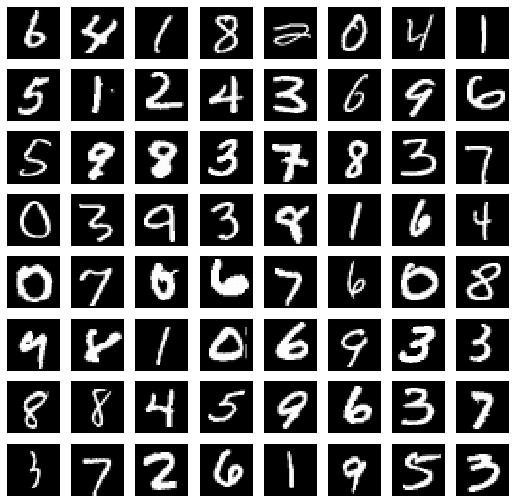

In [7]:
# dùng vẽ đồ thị, hình ảnh
import matplotlib.pyplot as plt 

# Tạo dang sách 9 phần tử ngẫu nhiên từ m_train có 60.000 phần tử
indices = list(np.random.randint(60000, size=64))

fig = plt.figure(figsize=(9,9))
columns = 8
rows = 8
for i in range(1, columns*rows +1):
    img = X_train[indices[i-1]].reshape(28,28)
    fig.add_subplot(rows, columns, i)
    
    plt.axis('off')
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)

In [14]:
# Lấy mẫu con của tập dữ liệu train
m_train = 50000
m_validation = 10000

mask = list(range(m_train, m_train + m_validation)) # Tạo list gồm 1000 số từ 5900 đến 60.000
X_val = X_train[mask] # Tập con X_val gồm 1000 hình ảnh được lấy từ phần tử thứ 59000 đến 60.000 của X_train
y_val = y_train[mask] # Lấy 1000 nhãn từ tập nhãn y_train từ thứ tự 59000 

mask = list(range(m_train)) # Tạo list gồm 59000 số từ 0 đến 59000
X_train = X_train[mask] # Tạo lại tập X_train gồm 59000 hình ảnh được lấy từ phần tử thứ 0 đến 59.000 của X_train
y_train = y_train[mask] # Lấy 59000 nhãn từ tập nhãn y_train từ 0

mask = list(range(m_test))
X_test = X_test[mask]
y_test = y_test[mask]
# Reshape data to rows
X_train = X_train.reshape(m_train, -1) # chuyển X_train thành ma trận có m_train hàng (59000 hàng)
X_val = X_val.reshape(m_validation, -1) # chuyển X_val thành ma trận có m_train hàng (1000 hàng)
X_test = X_test.reshape(m_test, -1) # chuyển X_val thành ma trận có m_train hàng (10000 hàng)
print("X_train shape: " + str(X_train.shape))
print("y_train shape: " + str(y_train.shape))
print("X_val shape: " + str(X_val.shape))
print("y_val shape: " + str(y_val.shape))
print("X_test shape: " + str(X_test.shape))
print("y_test shape: " + str(y_test.shape))
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of validation examples: m_validation = " + str(m_validation))
print ("Number of testing examples: m_test = " + str(m_test))

X_train shape: (50000, 784)
y_train shape: (50000,)
X_val shape: (10000, 784)
y_val shape: (10000,)
X_test shape: (10000, 784)
y_test shape: (10000,)
Number of training examples: m_train = 50000
Number of validation examples: m_validation = 10000
Number of testing examples: m_test = 10000
